In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset

In [21]:
df = pd.read_csv('bankDetails.csv')
df["Employer_Category1"]

0        A
1        C
2        C
3        A
4        A
        ..
69708    A
69709    A
69710    C
69711    C
69712    A
Name: Employer_Category1, Length: 69713, dtype: object

# Plotting all the categorical fields

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Deriving Age from DOB

In [4]:
import datetime

In [5]:
year = datetime.datetime.today().year

In [6]:
summ = 0
count = 0

def convert_age_from_DOB(df):
    global summ
    global count
    age = []

    for ele in df['DOB']:
        
        if type(ele) == str:
            temp = int(ele[-2 : ])
            if temp <= 30:
                temp += 2000
            else:
                temp += 1900

            temp  = year - temp
            age.append(temp)

            count += 1
            summ += temp
        else:
            age.append(-1)
            
    return age

age = convert_age_from_DOB(df)
mean = summ / count

In [7]:
age_final = []

for sarthak in age:
    
    if sarthak == -1:
        age_final.append(mean)
    else :
        age_final.append(sarthak)
        
print([ele for ele in age_final if ele == -1])

[]


In [8]:
df['City_Code'].nunique()

678

# Inserting the Age column into the dataframe

In [9]:
df.insert(4, "Age", [int(ele) for ele in age_final])

In [12]:
df_catagorical=df.select_dtypes(include=['category'])

In [16]:
x= df.select_dtypes(include=['object']).columns.tolist()
x

['ID',
 'Gender',
 'DOB',
 'Lead_Creation_Date',
 'City_Code',
 'City_Category',
 'Employer_Code',
 'Employer_Category1',
 'Customer_Existing_Primary_Bank_Code',
 'Primary_Bank_Type',
 'Contacted',
 'Source',
 'Source_Category']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   Age                                  69713 non-null  int64  
 5   City_Code                            68899 non-null  object 
 6   City_Category                        68899 non-null  object 
 7   Employer_Code                        65695 non-null  object 
 8   Employer_Category1                   65695 non-null  object 
 9   Employer_Category2                   65415 non-null  float64
 10  Monthly_Income                       69713 non-null  float64
 11  Customer_Existing_Primary_Ba

In [ ]:
plt.bar()

In [10]:
import seaborn as sns

In [11]:
import matplotlib.pyplot as plt

# Relation between Gender and Approval of Loan

42.69504970378552% leads are females
57.30495029621447% leads are males
Total number of female leads 29764
Total number of male leads 39949
Percentage of approved females are 0.8332213412175783% and Percentage of males approved are 1.9324638914616135%
Percentage of loans approved are 1.4631417382697631%


<AxesSubplot:xlabel='Gender', ylabel='count'>

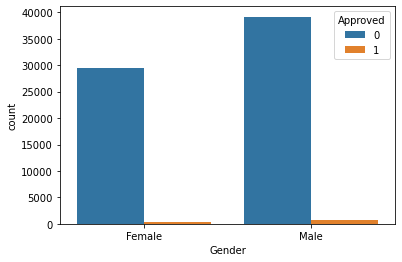

In [12]:
num_females = len([ele for ele in df['Gender'] if ele == 'Female'])
num_males = len([ele for ele in df['Gender'] if ele == 'Male'])

num_females_approved = 0

for count, ele in enumerate(df['Approved']):
    if ele == 1 and df['Gender'][count] == 'Female':
        num_females_approved += 1

num_males_approved = 0

for count, ele in enumerate(df['Approved']):
    if ele == 1 and df['Gender'][count] == 'Male':
        num_males_approved += 1
        
print(f"{(num_females / (num_males + num_females)) * 100}% leads are females")
print(f"{(num_males / (num_males + num_females)) * 100}% leads are males")

print("Total number of female leads", num_females)
print("Total number of male leads", num_males)



print(f"Percentage of approved females are {(num_females_approved / num_females) * 100}% and Percentage of males approved are {(num_males_approved / num_males) * 100}%")
print(f"Percentage of loans approved are {((num_females_approved + num_males_approved) / (num_females + num_males)) * 100}%")

sns.countplot(x ='Gender', hue = "Approved", data = df)

## Filling out the NULL values

In [13]:
df.isna().sum()

ID                                         0
Gender                                     0
DOB                                       15
Lead_Creation_Date                         0
Age                                        0
City_Code                                814
City_Category                            814
Employer_Code                           4018
Employer_Category1                      4018
Employer_Category2                      4298
Monthly_Income                             0
Customer_Existing_Primary_Bank_Code     9391
Primary_Bank_Type                       9391
Contacted                                  0
Source                                     0
Source_Category                            0
Existing_EMI                              51
Loan_Amount                            27709
Loan_Period                            27709
Interest_Rate                          47437
EMI                                    47437
Var1                                       0
Approved  

In [14]:
df.fillna(df.median(), inplace=True)

In [15]:
list_of_col = df.columns.to_list()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   Age                                  69713 non-null  int64  
 5   City_Code                            68899 non-null  object 
 6   City_Category                        68899 non-null  object 
 7   Employer_Code                        65695 non-null  object 
 8   Employer_Category1                   65695 non-null  object 
 9   Employer_Category2                   69713 non-null  float64
 10  Monthly_Income                       69713 non-null  float64
 11  Customer_Existing_Primary_Ba

# Dropping Customer_Existing_Primary_Bank_Code and Primary_Bank_Type and other similar columns because they are not important and contain the max number of NULL values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69713 entries, 0 to 69712
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   69713 non-null  object 
 1   Gender                               69713 non-null  object 
 2   DOB                                  69698 non-null  object 
 3   Lead_Creation_Date                   69713 non-null  object 
 4   Age                                  69713 non-null  int64  
 5   City_Code                            68899 non-null  object 
 6   City_Category                        68899 non-null  object 
 7   Employer_Code                        65695 non-null  object 
 8   Employer_Category1                   65695 non-null  object 
 9   Employer_Category2                   69713 non-null  float64
 10  Monthly_Income                       69713 non-null  float64
 11  Customer_Existing_Primary_Ba

In [18]:
df.drop(['Primary_Bank_Type', 'Customer_Existing_Primary_Bank_Code'], axis = 1, inplace = True)

In [19]:
df.drop(['Employer_Code'], axis = 1, inplace = True)

In [20]:
df.dropna(how = 'any', axis = 0, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65338 entries, 0 to 69712
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  65338 non-null  object 
 1   Gender              65338 non-null  object 
 2   DOB                 65338 non-null  object 
 3   Lead_Creation_Date  65338 non-null  object 
 4   Age                 65338 non-null  int64  
 5   City_Code           65338 non-null  object 
 6   City_Category       65338 non-null  object 
 7   Employer_Category1  65338 non-null  object 
 8   Employer_Category2  65338 non-null  float64
 9   Monthly_Income      65338 non-null  float64
 10  Contacted           65338 non-null  object 
 11  Source              65338 non-null  object 
 12  Source_Category     65338 non-null  object 
 13  Existing_EMI        65338 non-null  float64
 14  Loan_Amount         65338 non-null  float64
 15  Loan_Period         65338 non-null  float64
 16  Inte

In [22]:
df2 = pd.concat([df, pd.get_dummies(df['Employer_Category1'])], axis = 1)

In [23]:
df2

,ID,Gender,DOB,Lead_Creation_Date,Age,City_Code,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,...,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,A,B,C
0,APPC90493171225,Female,23/07/79,15/07/16,43,C10001,A,A,4.0,2000.0,...,0.0,30000.0,4.0,18.00,941.0,0,0,1,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,36,C10003,A,C,1.0,3500.0,...,0.0,20000.0,2.0,13.25,953.0,10,0,0,0,1
2,APPE70289249423,Male,10/12/82,19/07/16,40,C10125,C,C,4.0,2250.0,...,0.0,45000.0,4.0,18.00,941.0,0,0,0,0,1
3,APPF80273865537,Male,30/01/89,09/07/16,33,C10477,C,A,4.0,3500.0,...,0.0,92000.0,5.0,18.00,941.0,7,0,1,0,0
4,APPG60994436641,Male,19/04/85,20/07/16,37,C10002,A,A,4.0,10000.0,...,2500.0,50000.0,2.0,18.00,941.0,10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,APPU90955789628,Female,31/07/83,30/09/16,39,C10006,A,A,1.0,4900.0,...,0.0,30000.0,4.0,18.00,941.0,10,0,1,0,0
69709,APPV80989824738,Female,27/01/71,30/09/16,51,C10116,C,A,4.0,7190.1,...,1450.0,30000.0,4.0,18.00,941.0,7,0,1,0,0
69710,APPW50697209842,Female,01/02/92,30/09/16,30,C10022,B,C,4.0,1600.0,...,0.0,24000.0,4.0,35.50,943.0,2,0,0,0,1
69711,APPY50870035036,Male,27/06/78,30/09/16,44,C10002,A,C,3.0,9893.0,...,1366.0,80000.0,5.0,18.00,941.0,10,0,0,0,1


In [24]:
# df2 = pd.concat([df, pd.get_dummies(df['City_Category'])], axis = 1)
# df2
# df2['kart'] = df['Monthly_Income'] - df['Existing_EMI']
df2.rename(columns = {'Net_Monthly_Income':'kart'}, inplace = True)
df2

,ID,Gender,DOB,Lead_Creation_Date,Age,City_Code,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,...,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,A,B,C
0,APPC90493171225,Female,23/07/79,15/07/16,43,C10001,A,A,4.0,2000.0,...,0.0,30000.0,4.0,18.00,941.0,0,0,1,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,36,C10003,A,C,1.0,3500.0,...,0.0,20000.0,2.0,13.25,953.0,10,0,0,0,1
2,APPE70289249423,Male,10/12/82,19/07/16,40,C10125,C,C,4.0,2250.0,...,0.0,45000.0,4.0,18.00,941.0,0,0,0,0,1
3,APPF80273865537,Male,30/01/89,09/07/16,33,C10477,C,A,4.0,3500.0,...,0.0,92000.0,5.0,18.00,941.0,7,0,1,0,0
4,APPG60994436641,Male,19/04/85,20/07/16,37,C10002,A,A,4.0,10000.0,...,2500.0,50000.0,2.0,18.00,941.0,10,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,APPU90955789628,Female,31/07/83,30/09/16,39,C10006,A,A,1.0,4900.0,...,0.0,30000.0,4.0,18.00,941.0,10,0,1,0,0
69709,APPV80989824738,Female,27/01/71,30/09/16,51,C10116,C,A,4.0,7190.1,...,1450.0,30000.0,4.0,18.00,941.0,7,0,1,0,0
69710,APPW50697209842,Female,01/02/92,30/09/16,30,C10022,B,C,4.0,1600.0,...,0.0,24000.0,4.0,35.50,943.0,2,0,0,0,1
69711,APPY50870035036,Male,27/06/78,30/09/16,44,C10002,A,C,3.0,9893.0,...,1366.0,80000.0,5.0,18.00,941.0,10,0,0,0,1


In [25]:
df2.insert(len(df.columns), 'Net_Monthly_Income', [value for value in df['Monthly_Income'] - df['Existing_EMI']])

In [26]:
df2

,ID,Gender,DOB,Lead_Creation_Date,Age,City_Code,City_Category,Employer_Category1,Employer_Category2,Monthly_Income,...,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Net_Monthly_Income,A,B,C
0,APPC90493171225,Female,23/07/79,15/07/16,43,C10001,A,A,4.0,2000.0,...,30000.0,4.0,18.00,941.0,0,0,2000.0,1,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,36,C10003,A,C,1.0,3500.0,...,20000.0,2.0,13.25,953.0,10,0,3500.0,0,0,1
2,APPE70289249423,Male,10/12/82,19/07/16,40,C10125,C,C,4.0,2250.0,...,45000.0,4.0,18.00,941.0,0,0,2250.0,0,0,1
3,APPF80273865537,Male,30/01/89,09/07/16,33,C10477,C,A,4.0,3500.0,...,92000.0,5.0,18.00,941.0,7,0,3500.0,1,0,0
4,APPG60994436641,Male,19/04/85,20/07/16,37,C10002,A,A,4.0,10000.0,...,50000.0,2.0,18.00,941.0,10,0,7500.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,APPU90955789628,Female,31/07/83,30/09/16,39,C10006,A,A,1.0,4900.0,...,30000.0,4.0,18.00,941.0,10,0,4900.0,1,0,0
69709,APPV80989824738,Female,27/01/71,30/09/16,51,C10116,C,A,4.0,7190.1,...,30000.0,4.0,18.00,941.0,7,0,5740.1,1,0,0
69710,APPW50697209842,Female,01/02/92,30/09/16,30,C10022,B,C,4.0,1600.0,...,24000.0,4.0,35.50,943.0,2,0,1600.0,0,0,1
69711,APPY50870035036,Male,27/06/78,30/09/16,44,C10002,A,C,3.0,9893.0,...,80000.0,5.0,18.00,941.0,10,0,8527.0,0,0,1


In [27]:
[anything for anything in df2['Monthly_Income'] if type(anything) == float]

[2000.0,
 3500.0,
 2250.0,
 3500.0,
 10000.0,
 7000.0,
 7500.0,
 3000.0,
 2500.0,
 2500.0,
 2700.0,
 2899.4,
 2000.0,
 3150.0,
 6000.0,
 1200.0,
 4500.0,
 4500.0,
 2284.3,
 290.0,
 850.0,
 20000.0,
 7500.0,
 2100.0,
 1100.0,
 1800.0,
 4200.0,
 2500.0,
 800.0,
 12000.0,
 4000.0,
 3000.0,
 4000.0,
 3363.7,
 3000.0,
 4000.0,
 2910.0,
 3000.0,
 3000.0,
 5000.0,
 1000.0,
 1100.0,
 4000.0,
 4500.0,
 2500.0,
 1800.0,
 2000.0,
 2050.0,
 2500.0,
 2000.0,
 2470.0,
 1700.0,
 2000.0,
 2380.0,
 1500.0,
 2500.0,
 1826.3,
 1600.0,
 3000.0,
 2100.0,
 3500.0,
 2000.0,
 1200.0,
 1938.7,
 3500.0,
 10000.0,
 60000.0,
 2050.0,
 15150.0,
 5250.0,
 1800.0,
 1550.0,
 2000.0,
 3480.0,
 4000.0,
 1400.0,
 880.0,
 4350.0,
 1550.0,
 17600.0,
 5500.0,
 950.0,
 3000.0,
 5900.0,
 2700.0,
 3500.0,
 12000.0,
 6000.0,
 2298.9,
 2700.0,
 7000.0,
 1200.0,
 1200.0,
 6000.0,
 6000.0,
 4900.0,
 1680.0,
 2824.8,
 3200.0,
 3200.0,
 1200.0,
 5000.0,
 3950.0,
 1800.0,
 3000.0,
 900.0,
 1800.0,
 3000.0,
 3000.0,
 10000.0,
 10050.

0         2000.0
1         3500.0
2         2250.0
3         3500.0
4        10000.0
          ...   
69708     4900.0
69709     7190.1
69710     1600.0
69711     9893.0
69712     4230.0
Name: Monthly_Income, Length: 69713, dtype: float64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65338 entries, 0 to 69712
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  65338 non-null  object 
 1   Gender              65338 non-null  object 
 2   DOB                 65338 non-null  object 
 3   Lead_Creation_Date  65338 non-null  object 
 4   Age                 65338 non-null  int64  
 5   City_Code           65338 non-null  object 
 6   City_Category       65338 non-null  object 
 7   Employer_Category1  65338 non-null  object 
 8   Employer_Category2  65338 non-null  float64
 9   Monthly_Income      65338 non-null  float64
 10  Contacted           65338 non-null  object 
 11  Source              65338 non-null  object 
 12  Source_Category     65338 non-null  object 
 13  Existing_EMI        65338 non-null  float64
 14  Loan_Amount         65338 non-null  float64
 15  Loan_Period         65338 non-null  float64
 16  Inte

In [19]:
df2.isna().sum()


NameError: name 'df2' is not defined

In [30]:
df_cleaned_income = df2.drop(df2[df2['Monthly_Income'] > 40000].index)
df_cleaned_income.describe()

,Age,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Net_Monthly_Income,A,B,C
count,64999.000000,64999.000000,64999.000000,64999.000000,64999.000000,64999.000000,64999.000000,64999.000000,64999.000000,64999.000000,64999.000000,64999.000000,64999.000000,64999.000000
mean,36.607686,3.721411,3408.403032,361.505127,35814.797151,3.929445,18.422357,992.032539,4.173910,0.015477,3046.897905,0.506946,0.274973,0.218080
std,6.921549,0.805640,3476.243258,899.252946,24575.239075,0.935112,3.461305,431.386600,3.794005,0.123442,3262.624816,0.499956,0.446504,0.412945
min,23.000000,1.000000,1.000000,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
25%,32.000000,4.000000,1600.000000,0.000000,28000.000000,4.000000,18.000000,941.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,0.000000
50%,35.000000,4.000000,2400.000000,0.000000,30000.000000,4.000000,18.000000,941.000000,4.000000,0.000000,2150.000000,1.000000,0.000000,0.000000
75%,39.000000,4.000000,3999.500000,400.000000,38000.000000,5.000000,18.000000,941.000000,7.000000,0.000000,3500.000000,1.000000,1.000000,0.000000
max,71.000000,4.000000,40000.000000,27300.000000,300000.000000,6.000000,37.000000,9721.000000,10.000000,1.000000,40000.000000,1.000000,1.000000,1.000000


In [31]:
df_cleaned_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64999 entries, 0 to 69712
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  64999 non-null  object 
 1   Gender              64999 non-null  object 
 2   DOB                 64999 non-null  object 
 3   Lead_Creation_Date  64999 non-null  object 
 4   Age                 64999 non-null  int64  
 5   City_Code           64999 non-null  object 
 6   City_Category       64999 non-null  object 
 7   Employer_Category1  64999 non-null  object 
 8   Employer_Category2  64999 non-null  float64
 9   Monthly_Income      64999 non-null  float64
 10  Contacted           64999 non-null  object 
 11  Source              64999 non-null  object 
 12  Source_Category     64999 non-null  object 
 13  Existing_EMI        64999 non-null  float64
 14  Loan_Amount         64999 non-null  float64
 15  Loan_Period         64999 non-null  float64
 16  Inte

In [32]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


# Finding the correlation between different columns and APPROVED column

<ipython-input-32-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-32-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-32-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-32-c4d51ae7f98d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-32-c4d51ae7f98d>:

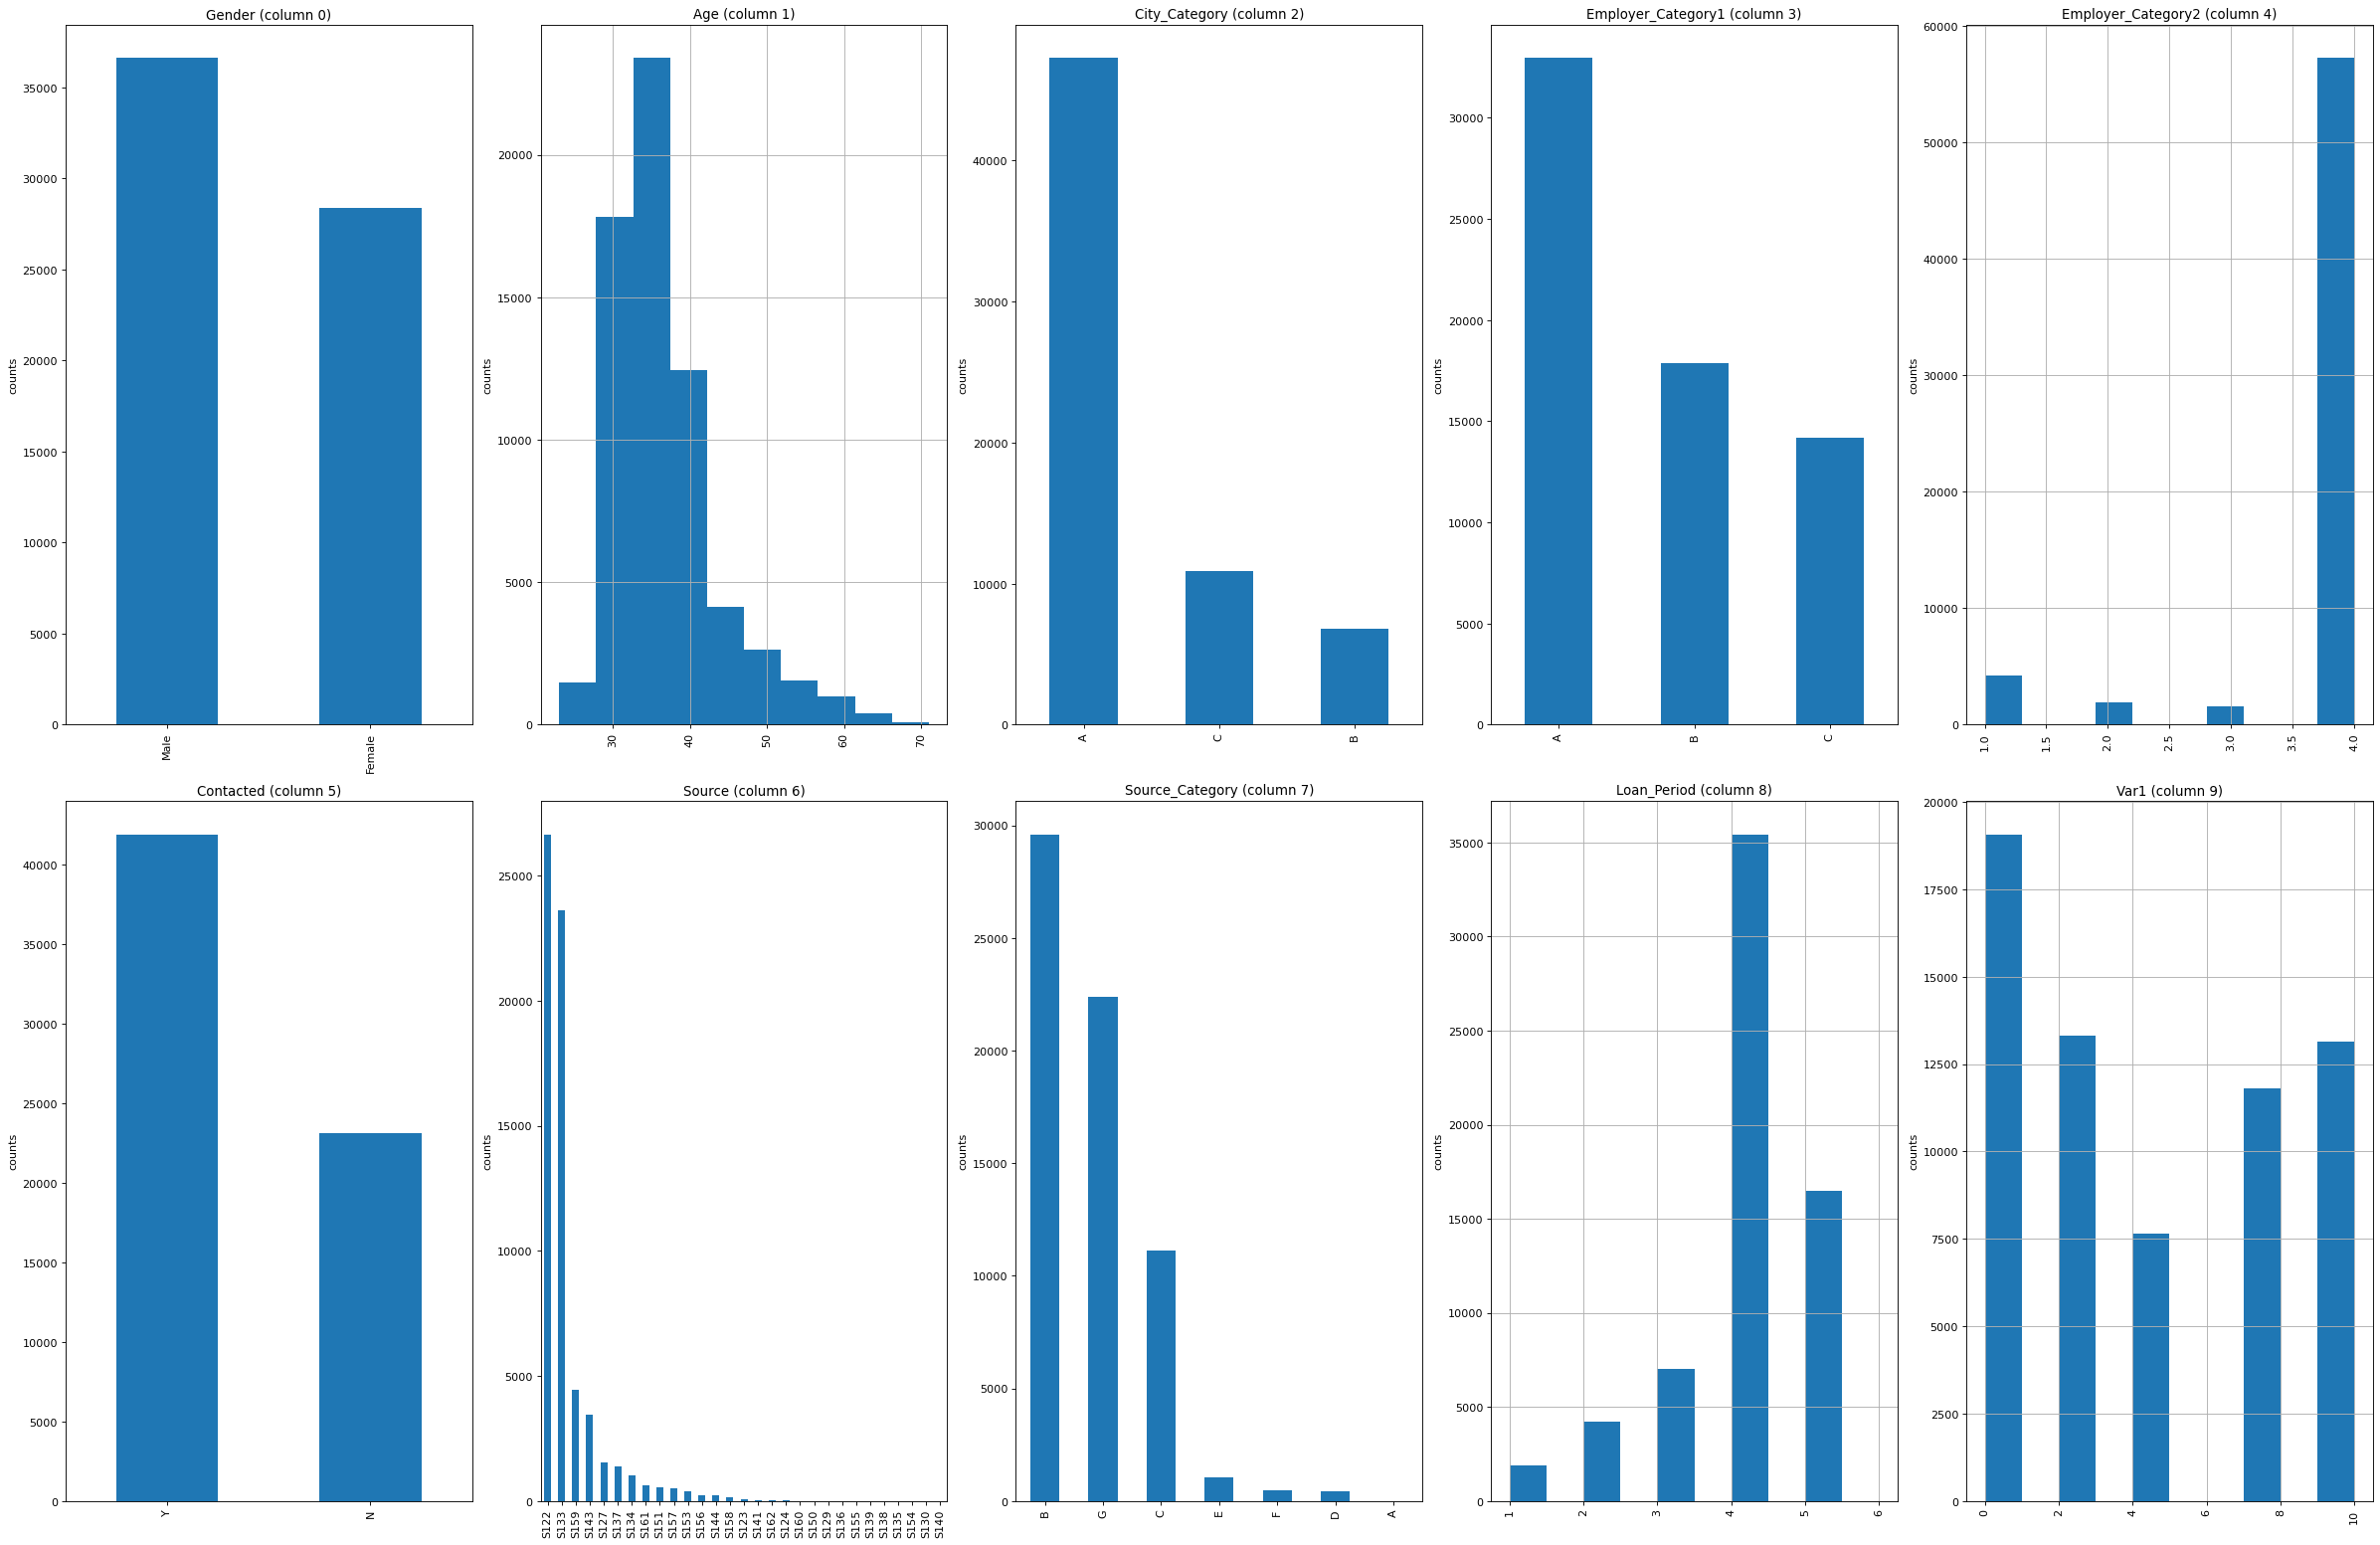

In [33]:
from sklearn.preprocessing import StandardScaler

plotPerColumnDistribution(df_cleaned_income, 10, 5)

In [34]:
correlation1 = df_cleaned_income[['Loan_Amount', 'Monthly_Income', 'Loan_Period', 'Age', 'A', 'B', 'C', 'Existing_EMI', 'Net_Monthly_Income', 'Approved']].corr()
correlation1.style.background_gradient(cmap='PuBu').set_precision(2)

,Loan_Amount,Monthly_Income,Loan_Period,Age,A,B,C,Existing_EMI,Net_Monthly_Income,Approved
Loan_Amount,1.00,0.41,0.37,0.12,-0.02,0.00,0.02,-0.02,0.44,0.05
Monthly_Income,0.41,1.00,-0.03,0.20,-0.03,0.03,0.01,0.36,0.97,0.08
Loan_Period,0.37,-0.03,1.00,0.04,0.02,-0.04,0.02,-0.01,-0.03,-0.00
Age,0.12,0.20,0.04,1.00,0.08,-0.07,-0.02,0.15,0.17,0.04
A,-0.02,-0.03,0.02,0.08,1.00,-0.62,-0.54,-0.02,-0.03,-0.04
B,0.00,0.03,-0.04,-0.07,-0.62,1.00,-0.33,0.02,0.03,0.02
C,0.02,0.01,0.02,-0.02,-0.54,-0.33,1.00,0.00,0.01,0.02
Existing_EMI,-0.02,0.36,-0.01,0.15,-0.02,0.02,0.00,1.00,0.11,0.07
Net_Monthly_Income,0.44,0.97,-0.03,0.17,-0.03,0.03,0.01,0.11,1.00,0.07
Approved,0.05,0.08,-0.00,0.04,-0.04,0.02,0.02,0.07,0.07,1.00


In [35]:
x = df_cleaned_income['Monthly_Income']
y = df_cleaned_income['Approved']

# Relation between Loan Amount of the customer and Approval of Loan

### This graph shows that higher Loan Amounts have less Approval rate

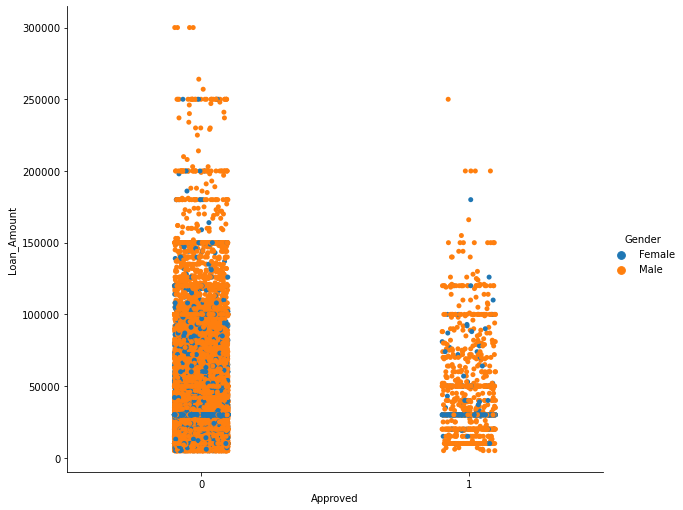

In [37]:
sns.catplot(x="Approved", y="Loan_Amount", hue = "Gender", height=7, aspect=1.2, data=df_cleaned_income)

# Relation between Loan Amount and Approval of Loan

### Most of the Loan Amounts requested lie around the the range of $50,000

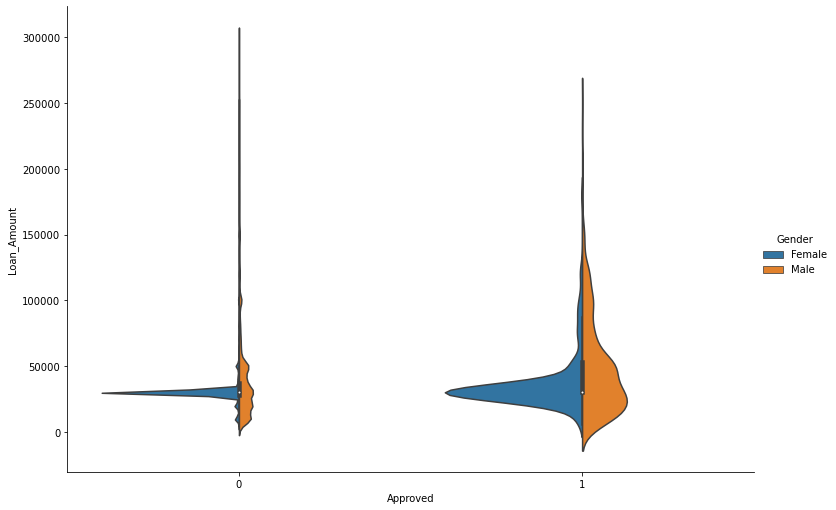

In [38]:
sns.catplot(x="Approved", y="Loan_Amount", hue="Gender", height=7, aspect=1.5, data=df_cleaned_income, kind="violin", split=True)

# Relation between Net_Monthly_Income and Approval of the Loans

### Monthly Income of both males and females getting Approvals is only a little bit greater than those who are not getting approved.
# This is interesting!!

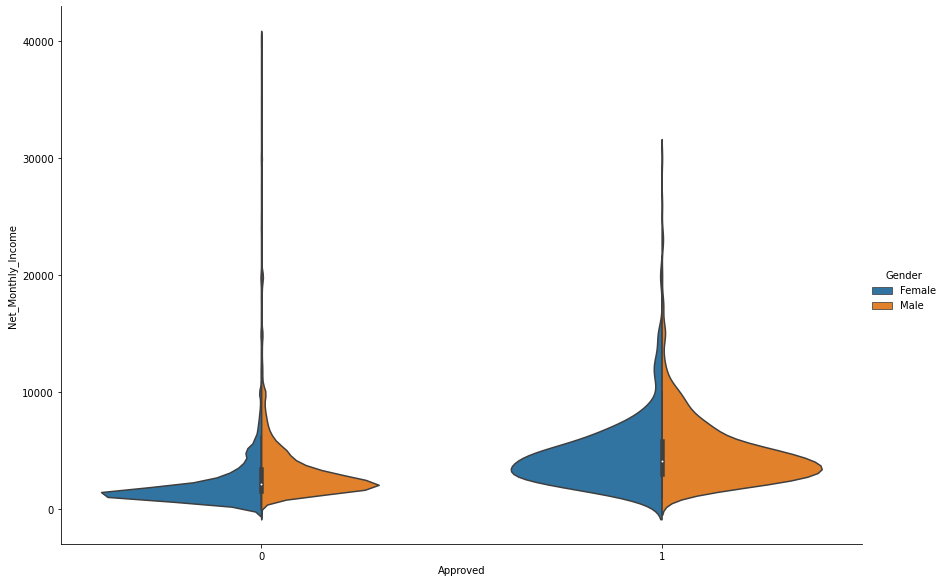

In [39]:
sns.catplot(x="Approved", y="Net_Monthly_Income", hue="Gender", height=8, aspect=1.5, data=df_cleaned_income, kind="violin", split=True)

# Relationship between Loan Period and Approval of Loan

### For females, most of the loan applications are made of 4 years
### For males, it is rathar distributed.

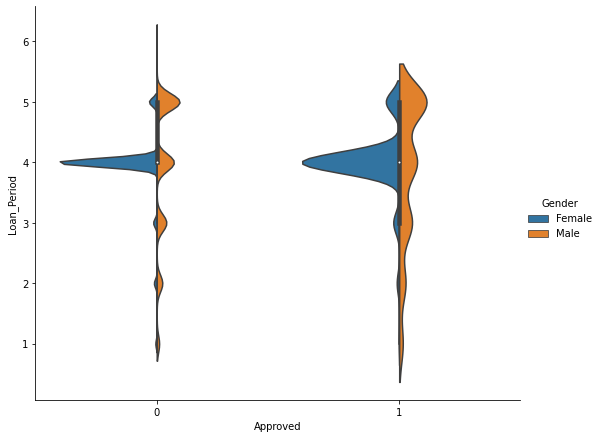

In [40]:
sns.catplot(x="Approved", y="Loan_Period", hue="Gender", height=6, aspect=1.2, data=df_cleaned_income, kind="violin", split=True)

# Relationship between Age and Approval of Loan

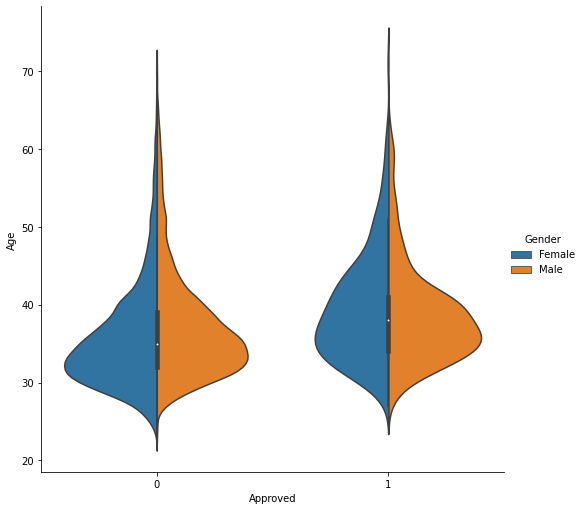

In [41]:
sns.catplot(x="Approved", y="Age", hue="Gender", height=7, aspect=1, data=df_cleaned_income,
            kind="violin", split=True)

# By seeing the above graph, we can infer that age has little to no effect on the approval of loan amount

# Data Wrangling

In [42]:
import sklearn

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65338 entries, 0 to 69712
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  65338 non-null  object 
 1   Gender              65338 non-null  object 
 2   DOB                 65338 non-null  object 
 3   Lead_Creation_Date  65338 non-null  object 
 4   Age                 65338 non-null  int64  
 5   City_Code           65338 non-null  object 
 6   City_Category       65338 non-null  object 
 7   Employer_Category1  65338 non-null  object 
 8   Employer_Category2  65338 non-null  float64
 9   Monthly_Income      65338 non-null  float64
 10  Contacted           65338 non-null  object 
 11  Source              65338 non-null  object 
 12  Source_Category     65338 non-null  object 
 13  Existing_EMI        65338 non-null  float64
 14  Loan_Amount         65338 non-null  float64
 15  Loan_Period         65338 non-null  float64
 16  Inte

In [44]:
df3 = pd.concat([df, pd.get_dummies(df['Gender'], drop_first = True)], axis = 1)

In [45]:
df3.drop(['Gender'], axis = 1, inplace = True)

In [47]:
list_IDS = df3['ID']
list_DOB = df3['DOB']
list_Lead_Creation_Date = df3['Lead_Creation_Date']
list_City_Code = df3['City_Code']
list_City_Category = df3['City_Category']
list_Employer_Category1 = df3['Employer_Category1']
list_Employer_Category2 = df3['Employer_Category2']
list_Source = df3['Source']
list_Source_Category = df3['Source_Category']

In [48]:
df3.drop(['ID', 'DOB', 'Lead_Creation_Date', 'City_Code', 'City_Category', 'Employer_Code', 'Employer_Category1', 'Source'], axis = 1, inplace = True)

KeyError: "['Employer_Code'] not found in axis"

In [51]:
df3.drop(['Employer_Category2'], axis = 1, inplace = True)

In [52]:
# df3.drop(['Primary_Bank_Type'], axis = 1, inplace = True)

In [53]:
df3.drop(['Contacted'], axis = 1, inplace = True)

In [54]:
df3

,ID,DOB,Lead_Creation_Date,Age,City_Code,City_Category,Employer_Category1,Monthly_Income,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved,Male
0,APPC90493171225,23/07/79,15/07/16,43,C10001,A,A,2000.0,S122,G,0.0,30000.0,4.0,18.00,941.0,0,0,0
1,APPD40611263344,07/12/86,04/07/16,36,C10003,A,C,3500.0,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0,1
2,APPE70289249423,10/12/82,19/07/16,40,C10125,C,C,2250.0,S143,B,0.0,45000.0,4.0,18.00,941.0,0,0,1
3,APPF80273865537,30/01/89,09/07/16,33,C10477,C,A,3500.0,S143,B,0.0,92000.0,5.0,18.00,941.0,7,0,1
4,APPG60994436641,19/04/85,20/07/16,37,C10002,A,A,10000.0,S134,B,2500.0,50000.0,2.0,18.00,941.0,10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,APPU90955789628,31/07/83,30/09/16,39,C10006,A,A,4900.0,S122,G,0.0,30000.0,4.0,18.00,941.0,10,0,0
69709,APPV80989824738,27/01/71,30/09/16,51,C10116,C,A,7190.1,S122,G,1450.0,30000.0,4.0,18.00,941.0,7,0,0
69710,APPW50697209842,01/02/92,30/09/16,30,C10022,B,C,1600.0,S122,G,0.0,24000.0,4.0,35.50,943.0,2,0,0
69711,APPY50870035036,27/06/78,30/09/16,44,C10002,A,C,9893.0,S122,G,1366.0,80000.0,5.0,18.00,941.0,10,0,1


In [55]:
df3.drop(['Source_Category'], axis = 1, inplace = True)

In [56]:
df3.drop(['Var1'], axis = 1, inplace = True)

In [57]:
df3

,ID,DOB,Lead_Creation_Date,Age,City_Code,City_Category,Employer_Category1,Monthly_Income,Source,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Approved,Male
0,APPC90493171225,23/07/79,15/07/16,43,C10001,A,A,2000.0,S122,0.0,30000.0,4.0,18.00,941.0,0,0
1,APPD40611263344,07/12/86,04/07/16,36,C10003,A,C,3500.0,S122,0.0,20000.0,2.0,13.25,953.0,0,1
2,APPE70289249423,10/12/82,19/07/16,40,C10125,C,C,2250.0,S143,0.0,45000.0,4.0,18.00,941.0,0,1
3,APPF80273865537,30/01/89,09/07/16,33,C10477,C,A,3500.0,S143,0.0,92000.0,5.0,18.00,941.0,0,1
4,APPG60994436641,19/04/85,20/07/16,37,C10002,A,A,10000.0,S134,2500.0,50000.0,2.0,18.00,941.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69708,APPU90955789628,31/07/83,30/09/16,39,C10006,A,A,4900.0,S122,0.0,30000.0,4.0,18.00,941.0,0,0
69709,APPV80989824738,27/01/71,30/09/16,51,C10116,C,A,7190.1,S122,1450.0,30000.0,4.0,18.00,941.0,0,0
69710,APPW50697209842,01/02/92,30/09/16,30,C10022,B,C,1600.0,S122,0.0,24000.0,4.0,35.50,943.0,0,0
69711,APPY50870035036,27/06/78,30/09/16,44,C10002,A,C,9893.0,S122,1366.0,80000.0,5.0,18.00,941.0,0,1


# Training of the model

In [58]:
y = df3['Approved']

In [59]:
df3.drop(['Approved'], axis = 1, inplace=True)

In [60]:
ls1 = df3.columns.to_list()
x = df3[ls1]
x.shape

(65338, 15)

# KNeighborsClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
from sklearn import tree

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [64]:
x_train

,ID,DOB,Lead_Creation_Date,Age,City_Code,City_Category,Employer_Category1,Monthly_Income,Source,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Male
16197,APPE60380043837,09/06/87,24/07/16,35,C10010,A,C,1500.0,S133,0.0,33000.0,5.0,20.00,874.0,1
39816,APPF20296755109,16/02/94,26/08/16,28,C10006,A,A,2500.0,S133,1500.0,30000.0,4.0,18.00,941.0,0
5350,APPN80934551338,30/06/80,08/07/16,42,C10002,A,A,2650.0,S133,397.2,20000.0,5.0,19.00,519.0,0
52761,APPH60094826125,16/06/69,12/09/16,53,C10015,C,A,3600.0,S122,0.0,65000.0,4.0,13.99,1776.0,1
40279,APPX80708134133,10/02/90,27/08/16,32,C10004,A,C,2000.0,S122,181.4,10000.0,2.0,16.75,493.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66873,APPM30975145801,22/05/94,28/09/16,28,C10005,A,C,1700.0,S122,0.0,27000.0,4.0,31.50,996.0,1
38448,APPX50567718735,17/07/84,24/08/16,38,C10001,A,B,1830.7,S143,355.6,30000.0,4.0,18.00,941.0,0
865,APPA20452893221,18/03/87,02/07/16,35,C10008,A,A,2250.0,S133,500.0,30000.0,4.0,18.00,941.0,0
15910,APPJ80528634933,09/04/84,23/07/16,38,C10006,A,C,5100.0,S137,0.0,50000.0,5.0,24.00,1438.0,1


In [65]:
model1 = KNeighborsClassifier(n_neighbors=5)

In [66]:
model1.fit(x_train, y_train)

ValueError: could not convert string to float: 'APPE60380043837'

In [ ]:
predictions = model1.predict(x_test)

In [ ]:
count = 0
y_test = np.array(y_test)

for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        count += 1
        
print("The accuracy of the model is ", (count / len(predictions) * 100))

# Decision Tree Classifier

In [67]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

ValueError: could not convert string to float: 'APPE60380043837'

In [68]:
predictions2 = clf.predict(x_test)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [69]:
count = 0
y_test = np.array(y_test)

for i in range(len(predictions2)):
    if predictions2[i] == y_test[i]:
        count += 1
print(count, len(predictions2))
print("The accuracy of the model is ", (count / len(predictions2) * 100))

NameError: name 'predictions2' is not defined

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf2 = RandomForestClassifier(n_estimators = 1000) 
clf2.fit(x, y)

In [ ]:
count = 0
y_test = np.array(y_test)

for i in range(len(predictions2)):
    if predictions2[i] == y_test[i]:
        count += 1
        
print("The accuracy of the model is ", (count / len(predictions2) * 100))

# Importing the test data

In [ ]:
test_data = pd.read_csv('bankDetails_test.csv')

In [ ]:
test_data

In [ ]:
test_data['Interest_Rate'] = test_data['Interest_Rate'].fillna(df['Interest_Rate'].median())

In [ ]:
test_data = test_data.fillna(test_data.median())

In [ ]:
test_data.info()

In [ ]:
age_test = convert_age_from_DOB(test_data)

In [ ]:
test_data.insert(4, "Age", age_test)

In [ ]:
test_data

In [ ]:
test_data = pd.concat([test_data, pd.get_dummies(test_data['Gender'], drop_first = True)], axis = 1)

In [ ]:
test_data.drop(['Gender'], axis = 1, inplace = True)

In [ ]:
test_data.drop(['ID', 'DOB', 'Lead_Creation_Date', 'City_Code', 'City_Category', 'Employer_Code', 'Employer_Category1', 'Source'], axis = 1, inplace = True)

In [ ]:
test_data.drop(['Customer_Existing_Primary_Bank_Code', 'Employer_Category2', 'Primary_Bank_Type', 'Var1'], axis = 1, inplace = True)

In [ ]:
test_data.drop(['Source_Category', 'Contacted'], axis = 1, inplace = True)

In [ ]:
predictions_on_test_data = model1.predict(test_data)
# x_train.shape, test_data.shape
print(predictions_on_test_data[ : 1000])

In [ ]:
approved_list = [ele for ele in predictions_on_test_data if ele == 1]
len(approved_list)

In [ ]:
print(f"The percenatage of approved loans are {len(approved_list) / len(predictions_on_test_data) * 100}%")